In [3]:
from src.zsoc import OCV_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# import the dataset
df = pd.read_csv('./res/K_para.csv')
df = df.drop(columns=['Sample No.', 'Battery Manufacturer', 'Serial Number', 'Cell Number'])
data = df.to_numpy()

# truncate off the last column (R0)
batteries = data[:, :-1]
print(batteries.shape)

(34, 8)


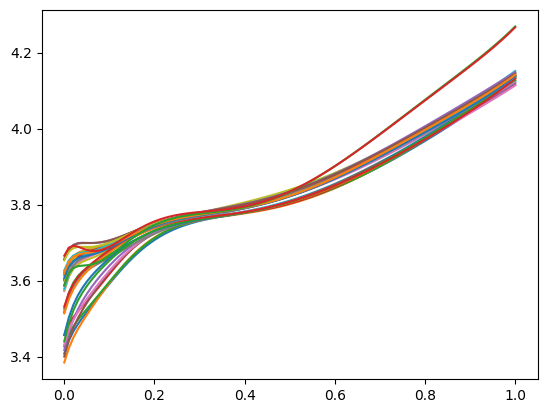

(34, 100)


In [5]:
# generate ocv curves for each battery
# for this stage, we will just use OCV curves as input
curves = []
for battery in batteries:
    b = OCV_curve(battery)
    plt.plot(b['zsoc'], b['Vo'])
    curves.append(b['Vo'])
plt.show()

curves = np.array(curves)
print(curves.shape)

In [6]:
# each curve is going to be used as the input
# the output will be the corresponding k parameters

# define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='linear')
])

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

2023-02-26 18:41:55.852818: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# train the model
model.fit(curves, batteries, epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 6ms/step - loss: 686.4153
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 595.2658
Epoch 3/10
2/2 [==============================] - 0s 4ms/step - loss: 512.8087
Epoch 4/10
2/2 [==============================] - 0s 4ms/step - loss: 429.1581
Epoch 5/10
2/2 [==============================] - 0s 4ms/step - loss: 347.1324
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 262.9177
Epoch 7/10
2/2 [==============================] - 0s 3ms/step - loss: 193.7178
Epoch 8/10
2/2 [==============================] - 0s 4ms/step - loss: 146.8933
Epoch 9/10
2/2 [==============================] - 0s 3ms/step - loss: 123.6464
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 132.9911
